<center><h1 style="font-size:8rem;"> Logistic Regression - Heart Disease</h1></center>

In [46]:
import pandas as pd

<h2 style="color:blue;">Importing Data</h2>

In [2]:
data = pd.read_csv("heart.csv")

<h2 style="color:blue">Checking basic information of the dataset</h2>

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h2 style="color:blue">Checking the target column</h2>

In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

<h2 style="color:blue">Visualizing the tatget field</h2>

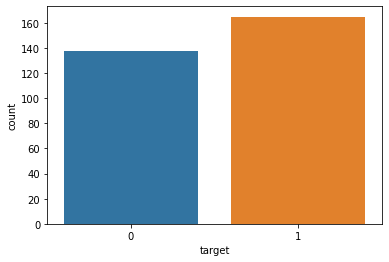

In [9]:
sns.countplot(x='target', data=data)
plt.show()

<h2 style="color:blue">Checking the correlations</h2>

In [11]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<h2 style="color:blue">Splitting of the data into training and testing data</h2>

In [24]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [30]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


y_train.head()

In [32]:
y_test.head()

,target
204,0
159,1
219,0
174,0
184,0


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


<h2 style="color:blue">Importing Logistic Regression and Fitting the model </h2>

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
model.intercept_

array([0.02105661])

In [38]:
model.coef_

array([[-3.80546382e-04, -1.71581171e+00,  1.01114110e+00,
        -2.02924342e-02, -2.63021597e-03, -1.35223727e-02,
         7.49786606e-01,  3.67417441e-02, -9.00123666e-01,
        -6.49908673e-01,  1.96063118e-01, -5.73731230e-01,
        -4.88341114e-01]])

In [39]:
y_pred=model.predict(X_test)

In [41]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [42]:
y_test

,target
204,0
159,1
219,0
174,0
184,0
...,...
0,1
288,0
259,0
179,0


<h2 style="color:blue">Checking Accuracy of the model</h2>

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred)

0.7704918032786885

## By accuracy we can't say a model is correct for that we should check the confusion matrix
## as accuracy= TP+TN/(TP+TN+FP+FN)

## We focus on precision = How accurate our positive predictions are (based on prediction)
## = TP/TP+FP

## Recall = Out if our actual positives and how many of them are predicted positive
## = TP/TP+FN

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)

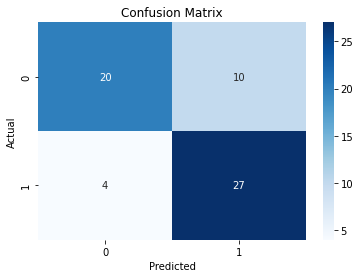

In [52]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Recall
recall = recall_score(y_test, y_pred) ##27/(27+4)
print(f'Recall: {recall:.2f}')


Recall: 0.87


In [54]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')#27/(27+10)

Precision: 0.73
